In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [60]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [8]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [9]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - np.dot(tx, w)  
    loss = np.mean(e ** 2) 
    return loss

In [10]:
print("The loss is: ", compute_loss(y,tx,np.array([[1],[2]])))

The loss is:  5442.885581514151


# 2. Grid Search

Fill in the function `grid_search()` below:

In [11]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            losses[i, j] = compute_loss(y, tx, np.array([w0, w1]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.213 seconds


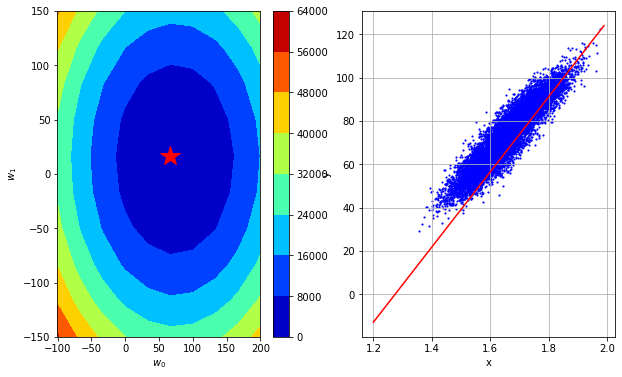

In [12]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [13]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    e = y - np.dot(tx, w)
    N = len(y)
    gradient = -1/N * np.dot(tx.T, e)
    return gradient

Please fill in the functions `gradient_descent` below:

In [21]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss=compute_loss(y,tx,w)
        gradient=compute_gradient(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [25]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5584.473425518335, w0=51.30574540147352, w1=9.435798704492393
GD iter. 1/49: loss=530.604924217924, w0=66.69746902191565, w1=12.266538315840034
GD iter. 2/49: loss=75.75675910088322, w0=71.31498610804833, w1=13.115760199244338
GD iter. 3/49: loss=34.82042424034899, w0=72.70024123388814, w1=13.370526764265632
GD iter. 4/49: loss=31.13615410290091, w0=73.11581777164008, w1=13.446956733772023
GD iter. 5/49: loss=30.80456979053059, w0=73.24049073296567, w1=13.469885724623941
GD iter. 6/49: loss=30.77472720241726, w0=73.27789262136332, w1=13.476764421879517
GD iter. 7/49: loss=30.77204136948706, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=30.771799644523348, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=30.77177788927661, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=30.7717759313044, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=30.771775755086907, w0=73.29388305071, w1=13.479705271317192
GD iter.

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [35]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    e = y - np.dot(tx, w)  # Erreur pour le batch
    N = len(y)  # Taille du batch
    gradient = -1 / N * np.dot(tx.T, e)  # Calcul du gradient pour le batch
    return gradient


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        # Obtenir un mini-batch
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            # Calculer le gradient stochastique pour ce mini-batch
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)

            # Mettre à jour les poids avec le gradient stochastique
            w = w - gamma * gradient

            # Calculer la perte pour ce mini-batch
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            
            # Stocker les poids et les pertes
        ws.append(w.copy())
        losses.append(loss)
        
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [40]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=1437.8028748369152, w0=4.648976963552144, w1=-4.270274820369571
SGD iter. 1/49: loss=2957.4661703811303, w0=14.586413014389237, w1=14.393867273469201
SGD iter. 2/49: loss=3433.8473545513802, w0=21.127139158674687, w1=15.71659966965257
SGD iter. 3/49: loss=1834.5346879760261, w0=26.077793495386718, w1=18.638415939989272
SGD iter. 4/49: loss=2111.630817791072, w0=31.309571733189625, w1=16.203190246356154
SGD iter. 5/49: loss=983.2913798623703, w0=35.792775482972786, w1=9.85416802709599
SGD iter. 6/49: loss=296.9995802004431, w0=38.118523286935456, w1=6.921465847239535
SGD iter. 7/49: loss=785.6451180126404, w0=41.50922498794443, w1=4.017586064929866
SGD iter. 8/49: loss=753.9078742111584, w0=46.10527673661583, w1=12.012438941797061
SGD iter. 9/49: loss=213.83210255039452, w0=48.66829709371299, w1=16.66460142758496
SGD iter. 10/49: loss=461.7411990659114, w0=51.79889449432528, w1=12.089126600634145
SGD iter. 11/49: loss=646.1092726019145, w0=54.930684072096156, w1=15.

In [37]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [49]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

#With outliers
# height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# x, mean_x, std_x_wo = standardize(height)
# y, tx = build_model_data(x, weight)

In [50]:
y.shape, tx.shape

((200,), (200, 2))

In [51]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5658.544448876833, w0=51.54259072181176, w1=10.132993413506084
GD iter. 1/49: loss=534.1000517558858, w0=67.0053679383553, w1=13.172891437557825
GD iter. 2/49: loss=72.90005601500091, w0=71.64420110331838, w1=14.084860844773322
GD iter. 3/49: loss=31.39205639832127, w0=73.03585105280729, w1=14.358451666937965
GD iter. 4/49: loss=27.656336432820154, w0=73.45334603765397, w1=14.440528913587356
GD iter. 5/49: loss=27.320121635925045, w0=73.57859453310797, w1=14.46515208758217
GD iter. 6/49: loss=27.289862304204483, w0=73.61616908174418, w1=14.472539039780616
GD iter. 7/49: loss=27.287138964349634, w0=73.62744144633503, w1=14.474755125440149
GD iter. 8/49: loss=27.286893863762707, w0=73.63082315571229, w1=14.47541995113801
GD iter. 9/49: loss=27.286871804709882, w0=73.63183766852546, w1=14.475619398847368
GD iter. 10/49: loss=27.28686981939512, w0=73.63214202236942, w1=14.475679233160175
GD iter. 11/49: loss=27.286869640716795, w0=73.6322333285226, w1=14.475697183454017

In [52]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [61]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    e = y - np.dot(tx,w)
    subgradient = -np.dot(tx.T, np.sign(e)) / len(y)

    return subgradient

In [62]:
def compute_loss_MAE(y, tx, w):
    """Calculate the loss using MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = np.abs(y - np.dot(tx, w))
    loss = np.mean(e) 
    return loss

In [63]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        subgradient = compute_subgradient_mae(y, tx, w)
        loss = compute_loss_MAE(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w - gamma * subgradient

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [64]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=73.29392200210518, w0=0.7, w1=-1.846274244599044e-15
SubGD iter. 1/499: loss=72.59392200210517, w0=1.4, w1=-3.692548489198088e-15
SubGD iter. 2/499: loss=71.89392200210517, w0=2.0999999999999996, w1=-5.538822733797132e-15
SubGD iter. 3/499: loss=71.19392200210518, w0=2.8, w1=-7.385096978396176e-15
SubGD iter. 4/499: loss=70.49392200210517, w0=3.5, w1=-9.231371222995221e-15
SubGD iter. 5/499: loss=69.79392200210518, w0=4.2, w1=-1.1077645467594266e-14
SubGD iter. 6/499: loss=69.09392200210519, w0=4.9, w1=-1.292391971219331e-14
SubGD iter. 7/499: loss=68.39392200210517, w0=5.6000000000000005, w1=-1.4770193956792355e-14
SubGD iter. 8/499: loss=67.69392200210518, w0=6.300000000000001, w1=-1.66164682013914e-14
SubGD iter. 9/499: loss=66.99392200210517, w0=7.000000000000001, w1=-1.8462742445990445e-14
SubGD iter. 10/499: loss=66.29392200210518, w0=7.700000000000001, w1=-2.030901669058949e-14
SubGD iter. 11/499: loss=65.59392200210517, w0=8.4, w1=-2.2155290935188535e-14

In [65]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [66]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            # Calculer le gradient stochastique pour ce mini-batch
            subgradient = compute_subgradient_mae(minibatch_y, minibatch_tx, w)

            # Mettre à jour les poids avec le gradient stochastique
            w = w - gamma * subgradient

            # Calculer la perte pour ce mini-batch
            loss = compute_loss_MAE(minibatch_y, minibatch_tx, w)
            
            # Stocker les poids et les pertes
        ws.append(w.copy())
        losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [67]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=77.31549480507034, w0=0.7, w1=0.2069325645935772
SubSGD iter. 1/499: loss=52.95414651552714, w0=1.4, w1=-0.7128856962687439
SubSGD iter. 2/499: loss=54.72004532087549, w0=2.0999999999999996, w1=-1.3801552116303837
SubSGD iter. 3/499: loss=49.456736911346304, w0=2.8, w1=-2.4956852400358986
SubSGD iter. 4/499: loss=83.70344883762756, w0=3.5, w1=-1.8844758279972098
SubSGD iter. 5/499: loss=93.52485585826686, w0=4.2, w1=-0.5827111369553704
SubSGD iter. 6/499: loss=69.37860999349635, w0=4.9, w1=-0.2633372020742813
SubSGD iter. 7/499: loss=40.99495358481397, w0=5.6000000000000005, w1=-1.3131241545905392
SubSGD iter. 8/499: loss=35.17375045253651, w0=6.300000000000001, w1=-2.801502987522138
SubSGD iter. 9/499: loss=50.825732484175866, w0=7.000000000000001, w1=-3.6257939425906245
SubSGD iter. 10/499: loss=82.9727959876111, w0=7.700000000000001, w1=-3.0825525564697243
SubSGD iter. 11/499: loss=53.80996669637149, w0=8.4, w1=-3.8270876347986835
SubSGD iter. 12/499: loss=2

In [68]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>